# Tienda online
Junto con el departamento de marketing se ha recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Objetivo: Priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

Descripción de los datos

DATOS UTILIZADOS EN LA PRIMERA ARTE DEL PROYECTO:

/datasets/hypotheses_us.csv

Hypotheses: breves descripciones de las hipótesis.
Reach: alcance del usuario, en una escala del uno a diez.
Impact: impacto en los usuarios, en una escala del uno al diez.
Confidence: confianza en la hipótesis, en una escala del uno al diez.
Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.
DATOS UTILIZADOS EN LA SEGUNDA ARTE DEL PROYECTO:

/datasets/orders_us.csv

transactionId: identificador de pedido.
visitorId: identificador del usuario que realizó el pedido.
date: fecha del pedido.
revenue: ingresos del pedido.
group: el grupo del test A/B al que pertenece el usuario.
/datasets/visits_us.csv

date: la fecha.
group: grupo de la prueba A/B.
visits: el número de visitas en la fecha especificada en el grupo de pruebas A/B especificado.
El proyecto se divide en 2 partes:

Parte 1. Preprocesamiento de datos
Parte 2. Priorizar hipótesis
Parte 3. Análisis del test A/B

## Preprocesamiento de datos

In [1]:
#Importar librerias necesarias
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#Acceder a archivos
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', ';') #Se especifica el tipo de separador, ya que no es ','
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

### hypotheses

In [3]:
#Mustra de los datos
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
#Información general
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Nombre de las columnas y tipos de datos se ven bien.

### Orders

In [5]:
#Muestra de los datos
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [6]:
#Información general
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


Nombres columnas se ven bien, no hay valores ausentes evidentes y `date` se debe pasar a timedate.

In [7]:
#Cambiar el tipo de datos de date
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [8]:
#Verificar valores ausentes
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [9]:
#Verificar duplicados
orders.duplicated().sum()

0

### Visits

In [10]:
#Muestra de datos
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
#Información general
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Nombres columnas se ven bien, no hay valores ausentes evidentes y `date` se debe pasar a timedate.

In [12]:
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [13]:
#Verificar duplicados
visits.duplicated().sum()

0

In [14]:
#Verificar valortes ausentes
visits.isna().sum()

date      0
group     0
visits    0
dtype: int64

## Priorizar hipótesis

In [15]:
#Aplicar el framework ICE para priorizar hipótesis
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence'])/hypotheses['Effort']
hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


Según el método ICE la hipótesis `8` es la más prometedora, seguida por las hipótesis 0, 7 y 6. 

In [16]:
#Aplicar el framework RICE para priorizar hipótesis
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence'])/hypotheses['Effort']
hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


Según el método RICE la hipótesis `7` es la más prometedora, seguida por las hipótesis 2, 0 y 6.

Ambos métodos priorizan las hipótesis `7`, `0` y `6`. Sin embargo, no coindicen en la hipéotesis más prometedora. 

Al usar RICE, se obtiene una priorización que favorece las hipótesis con un mayor alcance (usuarios afectados), mientras que ICE se centra más en el impacto individual.

## Análisis del test A/B

In [17]:
#Crea una matriz con valores únicos de parejas fecha-grupo
datesGroups = orders[['date', 'group']].drop_duplicates()

#Obtener los datos diarios acumulados agregados sobre los pedidos 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'
        }
    ), axis=1
).sort_values(by=['date', 'group'])

In [18]:
#Obtener los datos diarios acumulados agregados sobre los visitantes
visitsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg(
        {
            'date' : 'max',
            'group' : 'max',
            'visits' : 'sum'
        }
    ), axis=1
).sort_values(by=['date','group'])

In [19]:
#Fusionar las dos tablas en una y dar a sus columnas nombres descriptivos
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

cumulativeData.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


### Representar gráficamente el ingreso acumulado por grupo

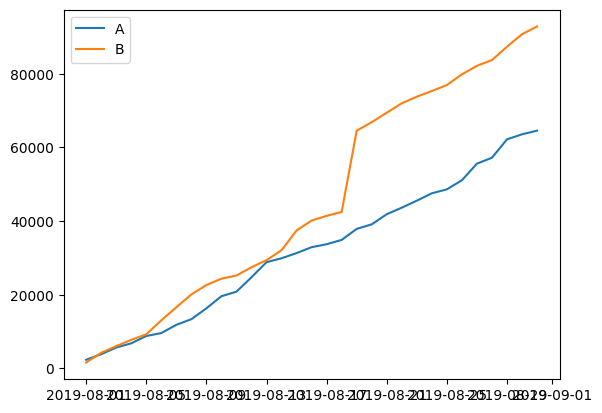

In [20]:
#DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Trazar el gráfico de ingresos del grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Trazar el gráfico de ingresos del grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

Los ingresos aumentan constantemente durante toda la prueba. Es una buena señal. Sin embargo, el grupo `B` tiene un pico muy grande en los ingresos. Esto puede implicar un aumento en el número de pedidos o la existencia de pedidos muy caros en la muestra.

### Representar gráficamente el tamaño de pedido promedio acumulado por grupo

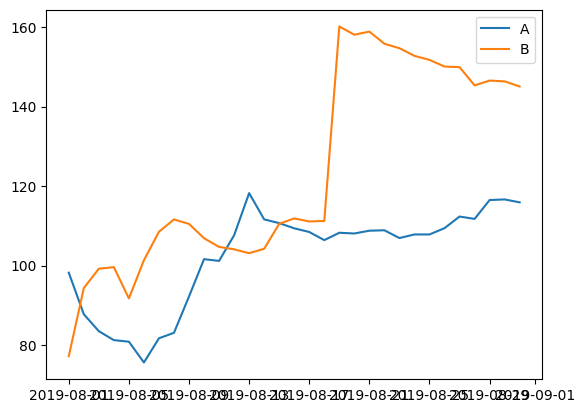

In [21]:
#Dividir los ingresos acumulados entre el número acumulado de pedidos
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend()

El grupo `B` también tiene un pico muy grande en el promedio de las compras. Se estabiliza al final de la prueba para el grupo `A` y comienza a caer para el grupo `B`. 

### Representar gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo `B` en comparación con el grupo `A`

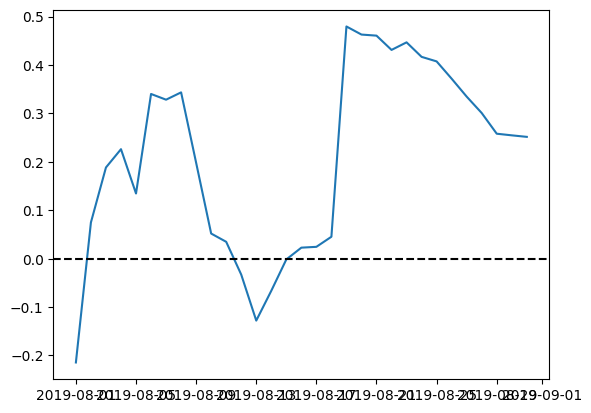

In [22]:
#Reunir los datos en un DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date',
                                                   right_on='date',
                                                   how='left',
                                                   suffixes=['A', 'B'])

#Trazar un gráfico de diferencia relativa para los tamaños de compra promedio
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

#Agregar el eje X
plt.axhline(y=0, color='black', linestyle='--')

En varios puntos, la diferencia entre los segmentos aumenta. ¡Esto significa que debe haber algunos pedidos grandes y valores atípicos

### Calcular la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día

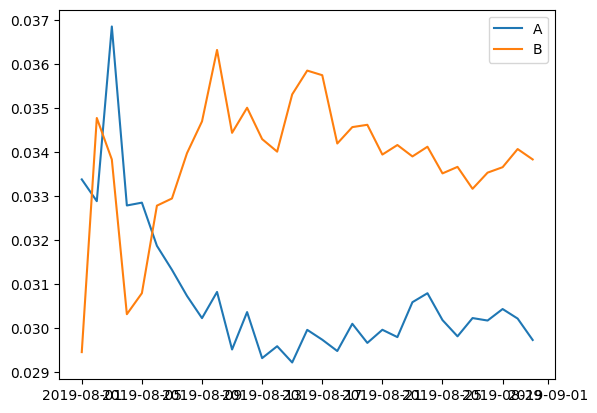

In [23]:
#Calcular la conversión acumulada
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

#Seleccionar datos en el grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

#Seleccionar datos en el grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#Trazar los gráficos
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

 El grupo `A` subió antes de disminuir después estabilizarse. El grupo `B` también subió y bajó antes de estabilizares, peor definitivamente tuvo un aumento en su tasa de conversión.

### Trazar un gráfico de dispersión del número de pedidos por usuario

In [24]:
#Obtener los datos número de pedidos por usuario
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head()

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


Hay muchos usuarios con `uno` o `dos`. Se desconoce la proporción exacta.

### Calcular los percentiles 95 y 99 del número de pedidos por usuario

In [25]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

No más del `5%` de los usuarios realizaron `2` pedidos y el `1%` de los usuarios realizaron `4`. Por lo tanto, sería razonable fijar un umbral de `2` órdenes por usuario como límite superior para un comportamiento normal y utilizarlo para filtrar cualquier anomalía. 

### Trazar un gráfico de dispersión de los precios de los pedidos

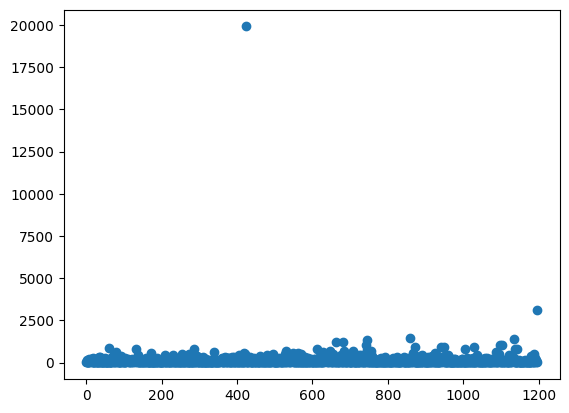

In [26]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

Hay un par de pedidos grandes. Según el gráfico, podemos establecer el límite para `pedidos anormales` a partir de `$2500`.

### Calcular los percentiles 95 y 99 de los precios de los pedidos

In [27]:
np.percentile(orders['revenue'], [95, 99])

array([435.54 , 900.904])

No más del `5%` de los usuarios realizaron compras por `$435.54` y el `1%` de los usuarios realizaron compras por `$900.90`. Por lo tanto, sería razonable fijar un umbral de `$900.90` como límite superior para un comportamiento normal y utilizarlo para filtrar cualquier anomalía.

In [28]:
#Crear las variables ordersByUsersA y ordersByUsersB para almacenar las columnas ['visitorId', 'orders']
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsersB.columns = ['visitorId', 'orders']

In [29]:
#Declarar las variables sampleA y sampleB con usuarios de diferentes grupos y números de pedidos correspondientes
#Los que no pidieron nada tendrán un 0

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [30]:
#Imprimir la ganancia relativa de conversión para el grupo B
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.017
0.138


Según los datos sin procesar, no hay diferencia entre los grupos A y B. 

La primera fila de la salida nos da el `valor p 0.017`, que es mayor que 0.05. Entonces, `no podemos rechazar la hipótesis nula` ya que no hay una diferencia estadísticamente significativa en la conversión entre los grupos. Pero la ganancia relativa del grupo B es del 13.8%.  

### Encontrar la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto

In [31]:
#Pasar los datos sobre los ingresos al criterio mannwhitneyu()
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.692
0.252


El `valor-p` es notablemente superior a 0.05, por lo que `no hay motivo para rechazar la hipótesis nula` y concluir que el tamaño promedio de los pedidos difiere entre los grupos. El tamaño de pedido promedio para el `grupo B` es  `25.2%` grande que para el `grupo A`.  

### Encontrar la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados

Se van a definir los `usuarios anómalos` como aquellos que realizan `más de 2 pedidos` o un `pedido mayor a $900.90`. Así se eliminarán el `1%` de los usuarios con mayor número de pedidos y los usuarios con los pedidos más caros. 

In [33]:
#Crear slices de datos con los usuarios que realizaron más de 2 pedidos (usersWithManyOrders) 
#y los usuarios que realizaron pedidos por más de $$900.90 (usersWithExpensiveOrders). 
#Se unen en una tabla llamada abnormalUsers
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 900.90]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head())

#Número total de usuarios anómalos
print('Usuarios anómalos:', abnormalUsers.shape) 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
Name: visitorId, dtype: int64
Usuarios anómalos: (31,)


En total, hay `31` usuarios anómalos. 

In [34]:
#Calcular la significancia estadística de las diferencias en la conversión entre los grupos con datos filtrados

#Número de pedidos por usuario para cada grupo de prueba
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [35]:
#Aplicar el criterio estadístico de Mann-Whitney a las muestras resultantes
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.010
0.174


Los resultados de conversión casi no cambiaron, pero ahora la diferencia entre los segmentos es del `17.4%` en lugar del `13.8%`. 

### Encontrar la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados

In [36]:
#Mostrar el valor p calculado con la prueba U de Mann-Whitney
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',  #Seleccionar datos en el grupo A
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],  #Excluir los usuarios anormales y seleccionar los datos de ingreso para el grupo A
    orders[np.logical_and(
        orders['group']=='B',  #Selecciona datos en el grupo B
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']  #Excluir los usuarios anormales y seleccionar los datos de ingreso para el grupo B
)[1]))  #Extraer el valor p de los resultados de la prueba

#Mostrar la diferencia relativa en el ingreso medio entre los grupos B y A
print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',  #Seleccionar datos en el grupo B
           np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() /  #Calcular el ingreso medio para el grupo B
    orders[np.logical_and(orders['group']=='A',  #Seleccionar datos en el grupo A
           np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))  #Calcular el ingreso medio para el grupo A y mostrar la diferencia relativa          

0.845
-0.020


El `valor p` aumentó pero ahora la diferencia entre los segmentos es del `2%` en lugar del `25.2%`. Con perdidas el en `grupo B`

### Tomar una decisión basada en los resultados de la prueba

`Conclusiones`
- Entre los datos sin procesar y los filtrados, se evidenció un ligero incremento (`3.6%`) para la conversión entre los grupos.
- Entre los datos sin procesar y los filtrados,  se evidenció una disminución del  `27.2%` en el tamaño promedio de los pedidos entre los grupos.
- Si bien para la conversión entre los grupos, el `grupo B` mostró mejores resultados que el `grupo A`, el tamaño promedio de los pedidos entre los grupos evidenció una perdida del `%2` en el `grupo B`.

`Decisión`
- Continuar la prueba para ver si en las próximas semanas alguno de los dos grupos se posiciona como líder. 